In [1]:
# Setting up spark
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

print(spark.version)
print(spark)

3.0.0-preview2


In [2]:
spark_df=spark.read.csv("hdfs://localhost:9000/eda/dc_investments.csv", header='true', inferSchema='true')
panda_df = spark_df.toPandas()

In [3]:
spark_df.printSchema()
spark_df.show(5)
spark_df.head(5)
spark_df.count()

root
 |-- _c0: integer (nullable = true)
 |-- company_permalink: string (nullable = true)
 |-- company_name: string (nullable = true)
 |-- company_category_list: string (nullable = true)
 |-- company_country_code: string (nullable = true)
 |-- company_region: string (nullable = true)
 |-- company_city: string (nullable = true)
 |-- investor_permalink: string (nullable = true)
 |-- investor_name: string (nullable = true)
 |-- investor_country_code: string (nullable = true)
 |-- funding_round_permalink: string (nullable = true)
 |-- funding_round_type: string (nullable = true)
 |-- funded_at: string (nullable = true)
 |-- raised_amount_usd: double (nullable = true)

+---+--------------------+------------------+---------------------+--------------------+--------------------+-------------+--------------------+--------------------+---------------------+-----------------------+------------------+----------+-----------------+
|_c0|   company_permalink|      company_name|company_category_list|

134686

In [5]:
columns_to_drop = ['_c0', 'company_permalink','investor_permalink','funding_round_permalink']
spark_df = spark_df.drop(*columns_to_drop)

In [6]:
spark_df.printSchema()

root
 |-- company_name: string (nullable = true)
 |-- company_category_list: string (nullable = true)
 |-- company_country_code: string (nullable = true)
 |-- company_region: string (nullable = true)
 |-- company_city: string (nullable = true)
 |-- investor_name: string (nullable = true)
 |-- investor_country_code: string (nullable = true)
 |-- funding_round_type: string (nullable = true)
 |-- funded_at: string (nullable = true)
 |-- raised_amount_usd: double (nullable = true)



In [7]:
#spark_df.describe().show()
spark_df[['raised_amount_usd']].describe().show()
#spark_df.describe().show()

+-------+--------------------+
|summary|   raised_amount_usd|
+-------+--------------------+
|  count|              134686|
|   mean|1.5157324276936444E7|
| stddev| 7.466328943606782E7|
|    min|                 0.0|
|    max|             1.76E10|
+-------+--------------------+



In [8]:
spark_df.describe('funded_at','funding_round_type').show()

+-------+----------+------------------+
|summary| funded_at|funding_round_type|
+-------+----------+------------------+
|  count|    134686|            134686|
|   mean|      null|              null|
| stddev|      null|              null|
|    min|1979-01-01|             angel|
|    max|2015-12-04|           venture|
+-------+----------+------------------+



In [10]:
spark_df.select('funding_round_type').distinct().rdd.map(lambda r: r[0]).collect()

['venture',
 'debt_financing',
 'post_ipo_equity',
 'equity_crowdfunding',
 'non_equity_assistance',
 'secondary_market',
 'angel',
 'convertible_note',
 'seed',
 'post_ipo_debt',
 'undisclosed',
 'private_equity',
 'product_crowdfunding',
 'grant']

In [11]:
spark_df.filter(spark_df['funding_round_type']=="product_crowdfunding").show()

+------------------+---------------------+--------------------+--------------+-------------+--------------------+---------------------+--------------------+----------+-----------------+
|      company_name|company_category_list|company_country_code|company_region| company_city|       investor_name|investor_country_code|  funding_round_type| funded_at|raised_amount_usd|
+------------------+---------------------+--------------------+--------------+-------------+--------------------+---------------------+--------------------+----------+-----------------+
|           Avegant| Audio|Displays|Ha...|                 USA|   SF Bay Area| Redwood City|         Kickstarter|                  USA|product_crowdfunding|2014-02-23|        1500000.0|
|           BandApp|                Music|                 GBR|          null|         null|           Crowdcube|                  GBR|product_crowdfunding|2013-11-26|         378812.0|
|      Blue Freedom| Energy|Technology...|                 USA|       

In [12]:
for col in spark_df.columns:
    print(col, "\t", "with null values: ", spark_df.filter(spark_df[col].isNull()).count())

company_name 	 with null values:  0
company_category_list 	 with null values:  0
company_country_code 	 with null values:  0
company_region 	 with null values:  8416
company_city 	 with null values:  8415
investor_name 	 with null values:  0
investor_country_code 	 with null values:  0
funding_round_type 	 with null values:  0
funded_at 	 with null values:  0
raised_amount_usd 	 with null values:  0


In [13]:
spark_df.select('investor_country_code').show()

+---------------------+
|investor_country_code|
+---------------------+
|                  CHN|
|                  DEU|
|                  HKG|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  USA|
|                  FRA|
|                  USA|
|                  USA|
+---------------------+
only showing top 20 rows



In [14]:
spark_df.createOrReplaceTempView("dc_investments")

In [15]:
panda_df = spark_df.toPandas()

In [16]:
print(len(panda_df.columns))
print((panda_df.count()))

10
company_name             134686
company_category_list    134686
company_country_code     134686
company_region           126270
company_city             126271
investor_name            134686
investor_country_code    134686
funding_round_type       134686
funded_at                134686
raised_amount_usd        134686
dtype: int64


In [18]:
panda_df[['company_category_list','company_country_code','investor_name','company_name','funding_round_type']].describe()

,company_category_list,company_country_code,investor_name,company_name,funding_round_type
count,134686,134686,134686,134686,134686
unique,17562,118,14184,38287,14
top,Biotechnology,USA,Sequoia Capital,DocuSign,venture
freq,8789,99231,1025,60,88803


In [20]:
panda_df.describe()

,raised_amount_usd
count,1.346860e+05
mean,1.515732e+07
std,7.466329e+07
min,0.000000e+00
25%,2.000000e+06
50%,6.000000e+06
75%,1.450000e+07
max,1.760000e+10


In [21]:
panda_df.head(10)

,company_name,company_category_list,company_country_code,company_region,company_city,investor_name,investor_country_code,funding_round_type,funded_at,raised_amount_usd
0,0-6.com,Curated Web,CHN,Beijing,Beijing,DT Capital Partners,CHN,venture,2008-03-19,2000000.0
1,004 Technologies,Software,USA,"Springfield, Illinois",Champaign,VCDE Venture Partners,DEU,venture,2014-07-24,6000000.0
2,01Games Technology,Games,HKG,Hong Kong,Hong Kong,Cyberport Hong Kong,HKG,undisclosed,2014-07-01,41250.0
3,H2O.ai,Analytics,USA,SF Bay Area,Mountain View,Capital One,USA,venture,2015-11-09,20000000.0
4,H2O.ai,Analytics,USA,SF Bay Area,Mountain View,Nexus Venture Partners,USA,seed,2013-05-22,3000000.0
5,H2O.ai,Analytics,USA,SF Bay Area,Mountain View,Nexus Venture Partners,USA,venture,2015-11-09,20000000.0
6,H2O.ai,Analytics,USA,SF Bay Area,Mountain View,Nexus Venture Partners,USA,venture,2013-01-03,1700000.0
7,H2O.ai,Analytics,USA,SF Bay Area,Mountain View,Nexus Venture Partners,USA,venture,2014-07-19,8900000.0
8,H2O.ai,Analytics,USA,SF Bay Area,Mountain View,Transamerica,USA,venture,2015-11-09,20000000.0
9,H2O.ai,Analytics,USA,SF Bay Area,Mountain View,Transamerica Ventures,USA,venture,2014-07-19,8900000.0


In [22]:
panda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134686 entries, 0 to 134685
Data columns (total 10 columns):
company_name             134686 non-null object
company_category_list    134686 non-null object
company_country_code     134686 non-null object
company_region           126270 non-null object
company_city             126271 non-null object
investor_name            134686 non-null object
investor_country_code    134686 non-null object
funding_round_type       134686 non-null object
funded_at                134686 non-null object
raised_amount_usd        134686 non-null float64
dtypes: float64(1), object(9)
memory usage: 10.3+ MB


In [23]:
panda_df.shape

(134686, 10)

In [26]:
panda_df.drop_duplicates(keep='first', inplace = True)

In [27]:
panda_df.shape

(134610, 10)

In [28]:
panda_df.isnull().sum().sort_values(ascending=False)

company_region           8413
company_city             8412
raised_amount_usd           0
funded_at                   0
funding_round_type          0
investor_country_code       0
investor_name               0
company_country_code        0
company_category_list       0
company_name                0
dtype: int64

In [29]:
count1=panda_df['company_category_list'].value_counts()
cc_list=count1.head(10)
print(cc_list)

Biotechnology          8789
Software               7603
Mobile                 2679
Enterprise Software    2621
Health Care            2507
Clean Technology       2464
E-Commerce             2415
Semiconductors         2292
Hardware + Software    2041
Curated Web            1881
Name: company_category_list, dtype: int64


In [30]:
count2=panda_df['funding_round_type'].value_counts()
acn_list=count2.head(10)
print(acn_list)

venture                88753
seed                   31161
undisclosed             4360
angel                   3408
private_equity          2239
debt_financing          1847
convertible_note        1188
grant                    957
equity_crowdfunding      276
post_ipo_equity          155
Name: funding_round_type, dtype: int64


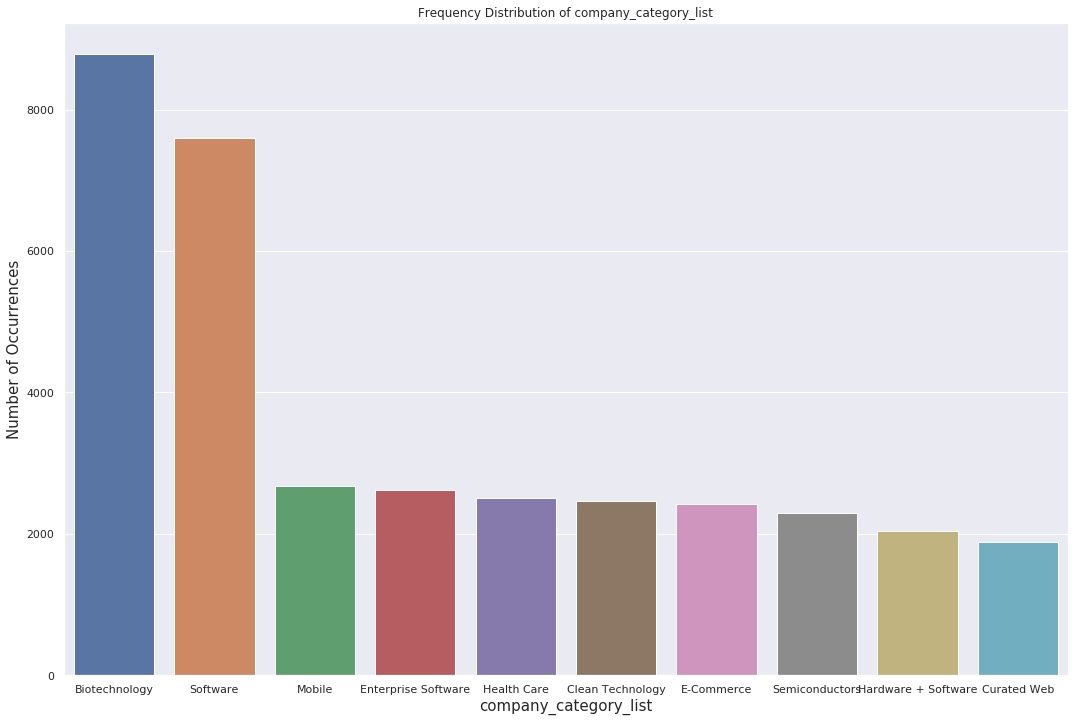

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(18,12)})
sns.set(style="darkgrid")
sns.barplot(cc_list.index, cc_list.values, alpha=1)
plt.title('Frequency Distribution of company_category_list')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('company_category_list', fontsize=15)
plt.show()

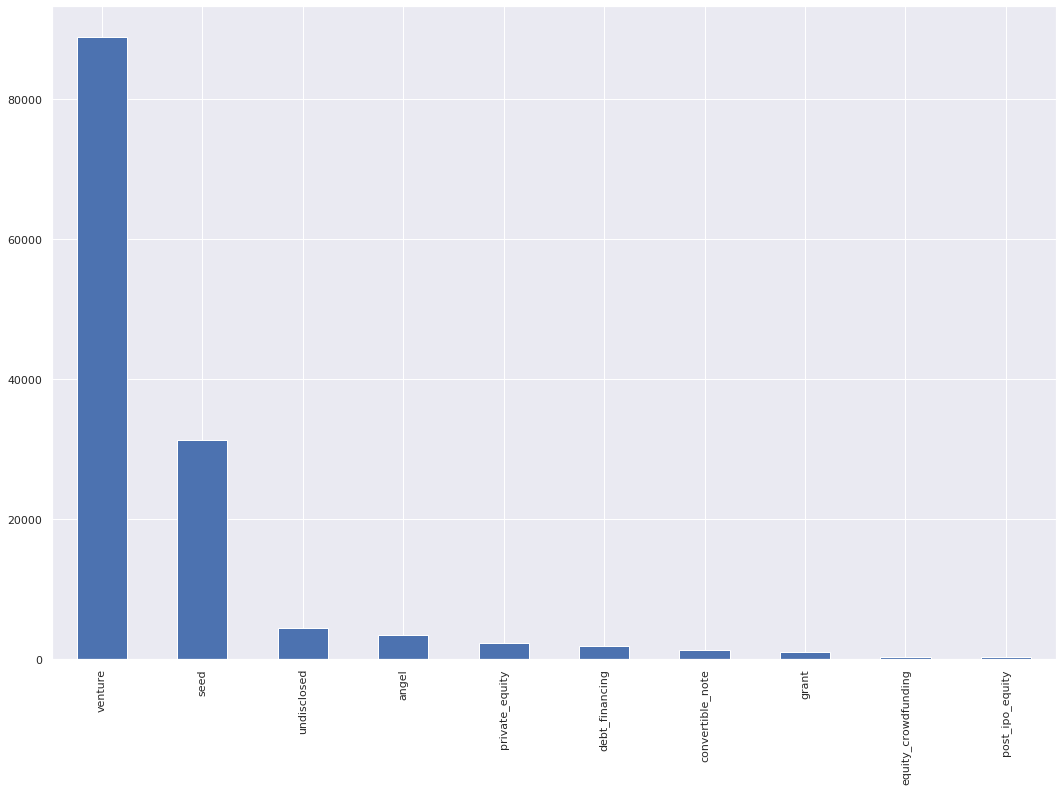

In [32]:
acn_list.plot.bar()

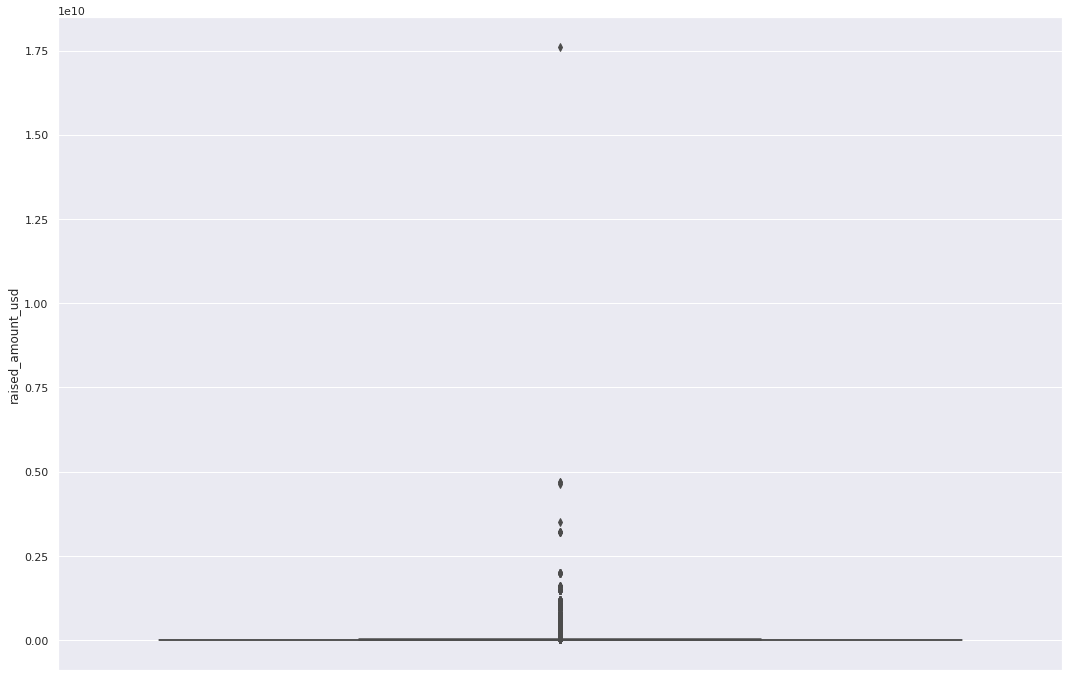

In [33]:
sns.boxplot( y=panda_df["raised_amount_usd"] )